In [6]:
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline 
import statsmodels.formula.api as smf
import numpy as np
import scipy.stats as stats 

In [14]:
#First 50rows of Data Frame
housing = pd.read_csv('housing.csv',index_col=0)
housing.iloc[:50,:5]

,LSTAT,INDUS,NOX,RM,MEDV
0,4.98,2.31,0.538,6.575,24.0
1,9.14,7.07,0.469,6.421,21.6
2,4.03,7.07,0.469,7.185,34.7
3,2.94,2.18,0.458,6.998,33.4
4,5.33,2.18,0.458,7.147,36.2
5,5.21,2.18,0.458,6.430,28.7
6,12.43,7.87,0.524,6.012,22.9
7,19.15,7.87,0.524,6.172,27.1
8,29.93,7.87,0.524,5.631,16.5
9,17.10,7.87,0.524,6.004,18.9


In [30]:
#Using Covariance to calculatue association between each variable 
housing.cov()

,LSTAT,INDUS,NOX,RM,MEDV,GuessResponse,observederror,BestResponse
LSTAT,50.994760,29.580270,0.488946,-3.079741,-48.447538,-3.079741,-45.367797,-28.032142
INDUS,29.580270,47.064442,0.607074,-1.887957,-30.520823,-1.887957,-28.632866,-17.184386
NOX,0.488946,0.607074,0.013428,-0.024603,-0.455412,-0.024603,-0.430809,-0.223943
RM,-3.079741,-1.887957,-0.024603,0.493671,4.493446,0.493671,3.999775,4.493446
MEDV,-48.447538,-30.520823,-0.455412,4.493446,84.586724,4.493446,80.093278,40.899834
GuessResponse,-3.079741,-1.887957,-0.024603,0.493671,4.493446,0.493671,3.999775,4.493446
observederror,-45.367797,-28.632866,-0.430809,3.999775,80.093278,3.999775,76.093503,36.406388
BestResponse,-28.032142,-17.184386,-0.223943,4.493446,40.899834,4.493446,36.406388,40.899834


In [15]:
#Calculating Correlation as its fits this data better in this case
housing.corr()

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,1.000000,0.603800,0.590879,-0.613808,-0.737663
INDUS,0.603800,1.000000,0.763651,-0.391676,-0.483725
NOX,0.590879,0.763651,1.000000,-0.302188,-0.427321
RM,-0.613808,-0.391676,-0.302188,1.000000,0.695360
MEDV,-0.737663,-0.483725,-0.427321,0.695360,1.000000


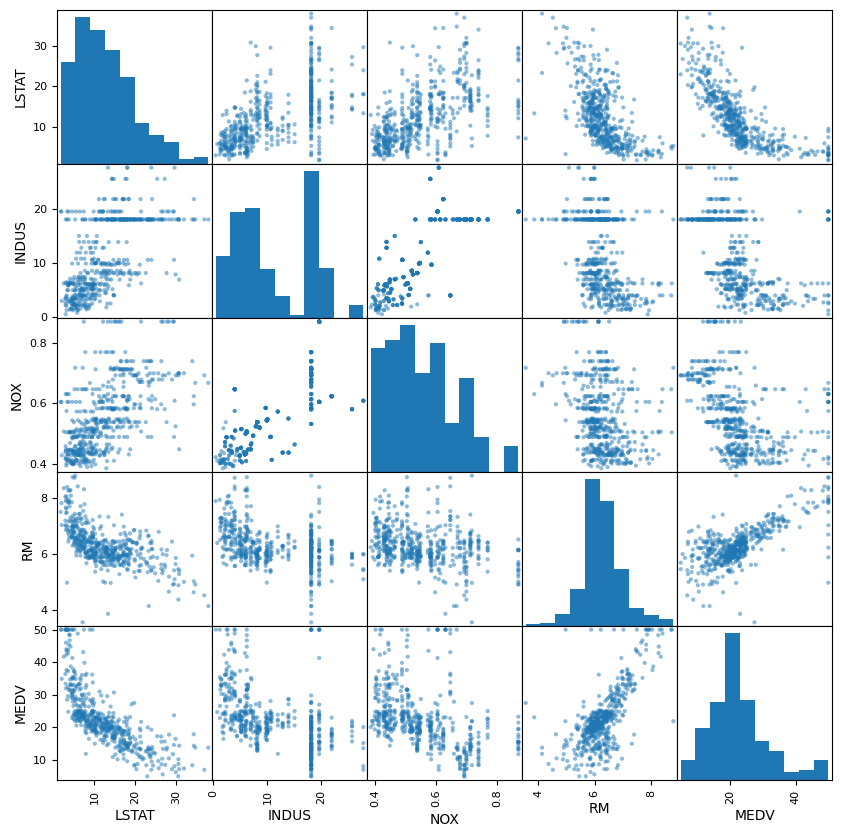

In [27]:
from pandas.plotting import scatter_matrix
sm = scatter_matrix(housing,figsize=(10,10))

In [29]:
# guess what are the real values of intercept and slope
# call our guess b0, b1
# assign the value of b0, b1 to get a straight line that can describe our data 
b0 = 0.1 
b1 = 1
housing['GuessResponse']=b0+b1*housing['RM'] 

In [23]:
# Also want to know the error of of guess...
# This show how far is our guess response from the true response
housing['observederror'] = housing['MEDV'] - housing['GuessResponse']

<function matplotlib.pyplot.show(close=None, block=None)>

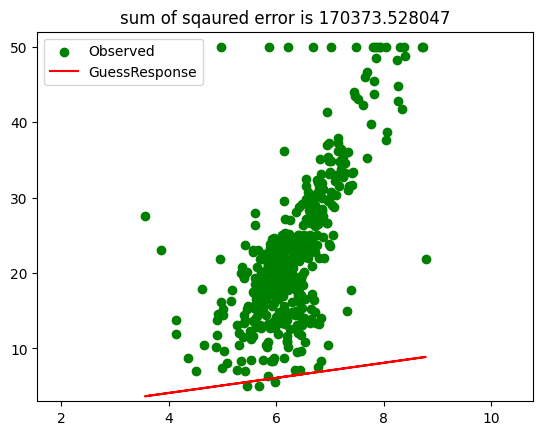

In [25]:
# plot your estimated line together with the points
figsize=(10, 10)
plt.title('sum of sqaured error is {}'.format(((housing['observederror']**2)).sum()))
plt.scatter(housing['RM'],housing['MEDV'],color='green',label='Observed')
plt.plot(housing['RM'],housing['GuessResponse'],color='red',label='GuessResponse')
plt.legend()
plt.xlim(housing['RM'].min()-2,housing['RM'].max()+2)
plt.ylim(housing['MEDV'].min()-2,housing['MEDV'].max()+2)
plt.show

In [26]:
# Estimated intercept and slope by least square estimation with formula
model = smf.ols(formula = 'MEDV~RM' ,data=housing).fit()
ols_b0 = model.params.iloc[0]
ols_b1 = model.params.iloc[1]
# Also want to know the error of of guess
housing['BestResponse'] = ols_b0+ols_b1*housing['RM']

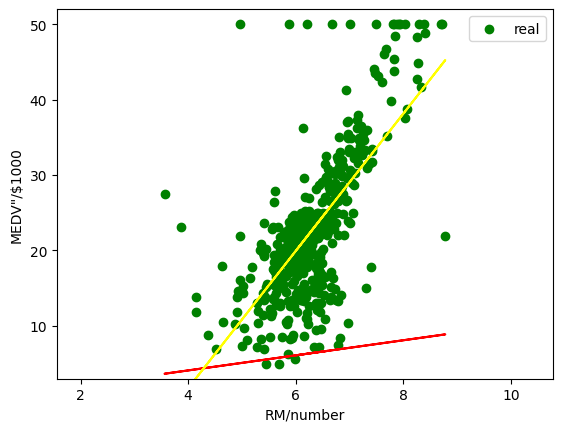

In [27]:
# plot estimated line together with the points
figsize=(10,10)
# See if the error drops after you use least square method
plt.scatter(housing['RM'],housing['MEDV'],color='g',label='real')
plt.plot(housing['RM'],housing['GuessResponse'],color='red')
plt.plot(housing['RM'],housing['BestResponse'],color='yellow')
plt.ylabel('MEDV"/$1000')
plt.xlabel('RM/number')
plt.xlim(np.min(housing['RM'])-2,np.max(housing['RM'])+2)
plt.ylim(np.min(housing['MEDV'])-2,np.max(housing['MEDV'])+2)
plt.legend()
plt.show()

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 02 May 2024   Prob (F-statistic):           2.49e-74
Time:                        10:07:36   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h1>Diagnostics of Linear Regression

<h2> Assumptions behind linear regression model
<h3> 1. Linearity
<h3> 2. Independence
<h3> 3. Normality
<h3> 4. Equal Variance

<h4> 1. Linearity

<Axes: xlabel='RM', ylabel='MEDV'>

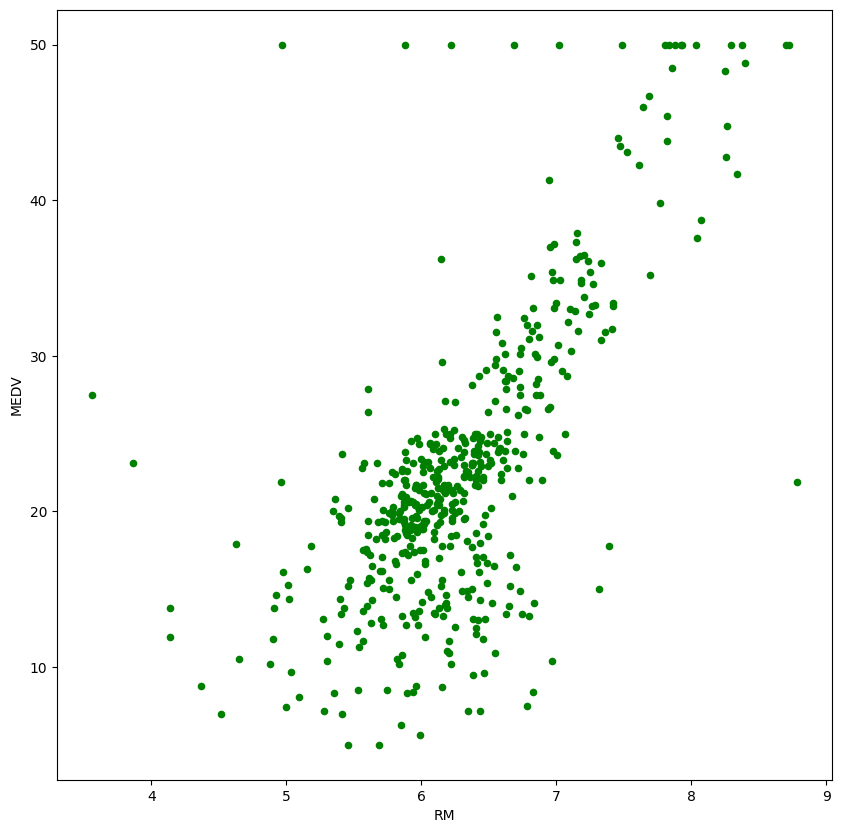

In [39]:
# you can check the scatter plot to have a fast check
housing.plot(kind='scatter', x='RM', y='MEDV', figsize=(10, 10), color='g')

<h4> 2. Independence

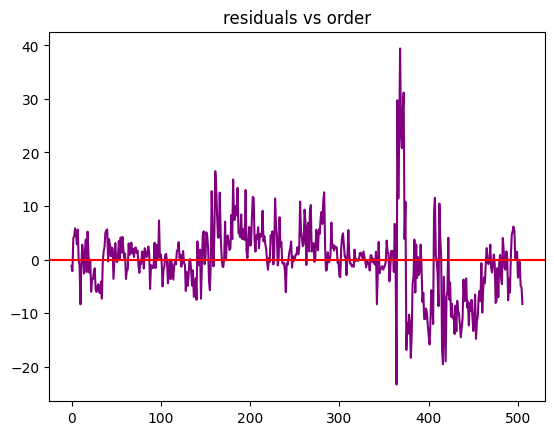

In [49]:
# Get all errors (residuals)
housing['error']=housing['MEDV'] - housing['BestResponse']
# Method 1: Residual vs order plot
# error vs order plot (Residual vs order) as a fast check 
figsize=(15,8)
plt.title('residuals vs order')
plt.plot(housing.index,housing['error'],color='purple')
plt.axhline(y=0,color='red')
plt.show()

In [41]:
# Method 2: Durbin Watson Test
# Check the Durbin Watson Statistic
# Rule of thumb: test statistic value in the range of 1.5 to 2.5 are relatively normal
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 02 May 2024   Prob (F-statistic):           2.49e-74
Time:                        10:41:20   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h4> 3. Normality 

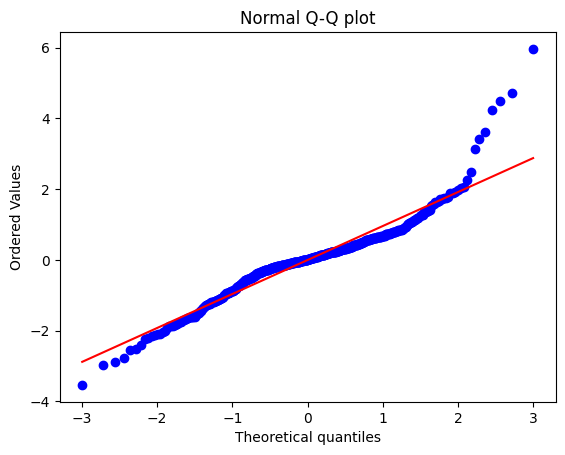

In [56]:
z = (housing['error'] - housing['error'].mean())/housing['error'].std(ddof=1)

stats.probplot(z,dist = 'norm',plot=plt)
plt.title('Normal Q-Q plot')
plt.show()


<h4> 4. Equal Variance

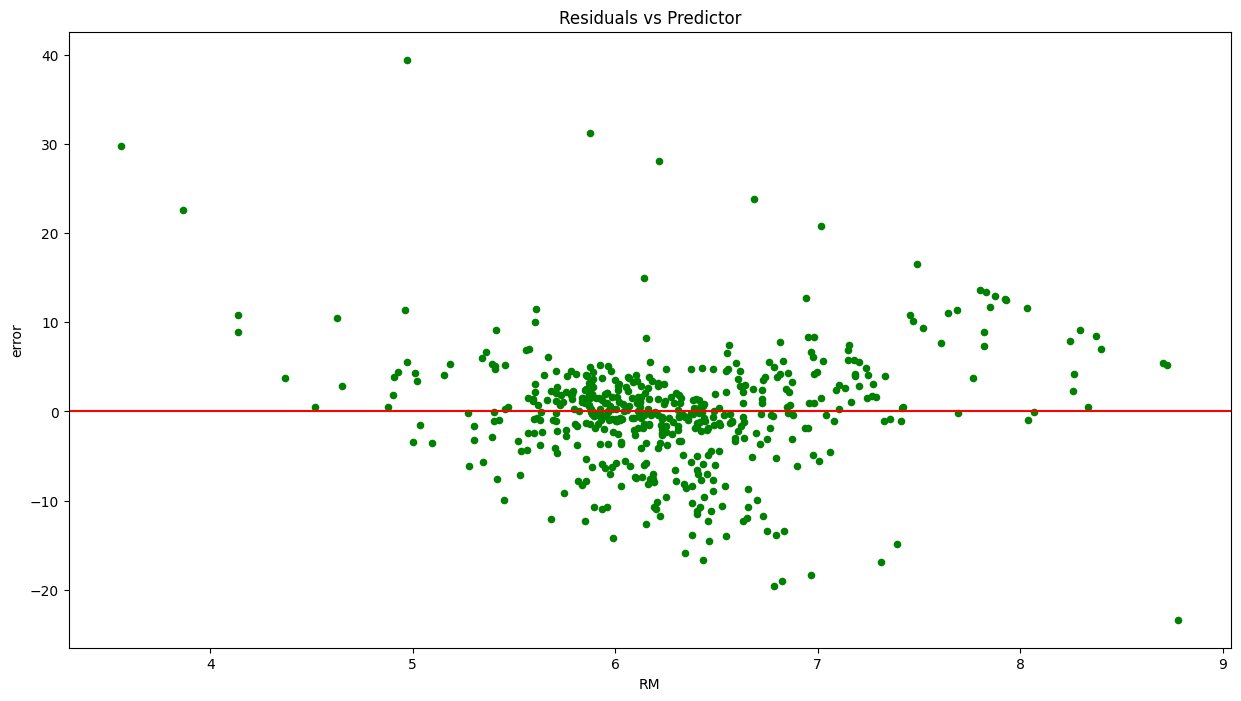

In [52]:
housing.plot(kind='scatter',x='RM',y='error',figsize=(15,8),color='green')
plt.title('Residuals vs Predictor')
plt.axhline(y=0,color='red')
plt.show()

<h1> We can see that the regression model (MEDV~RM) violates all four assumptions. Therefore, we cannot make statistical inference using this model.